## 2. Multilayer Perceptron

[Similar tutorial](https://www.tensorflow.org/get_started/mnist/pros)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Import data

The MNIST dataset can be automatically downloaded via tensorflow with the following:

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Try plotting one of the datapoints (from mnist.train.images) with matplotlib's `plt.imshow`. 

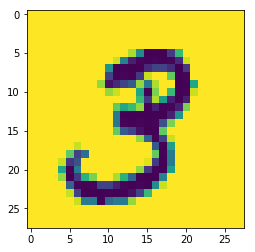

In [3]:
plt.imshow(np.reshape(-mnist.train.images[1], (28, 28)), interpolation='none');

## Network

Define placeholders for the data and labels, however now instead of feeding in one datapoint at a time, define the placeholders for minibatches of size 200.

In [5]:
batch_size = 200

x = tf.placeholder(tf.float32, shape=[None, 784])
y_true = tf.placeholder(tf.float32, shape=[None, 10])

Now define a two-layer perceptron with a third output layer, where each layer is a linear transformation followed by a sigmoid nonlinearity:

$$y=\sigma_{softmax}\circ A_2 \circ \sigma \circ A_1\circ \mathbf{W} $$

where 
- $A_i(x)=\mathbf{W}_i \mathbf{x}+\mathbf{b}_i$,
- $\sigma$ is a [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) function (`tf.nn.sigmoid`) and
- $\sigma_{softmax}$ is a [softmax](https://en.wikipedia.org/wiki/Softmax_function) function (`tf.nn.softmax`).

As initial values for the parameters, use a truncated normal with `stddev = 0.1` for the weight and a constant `0.1` for the bias.

In [6]:
# inferred variables (variables)
h1_size = 100
W1 = tf.Variable(tf.truncated_normal([784, h1_size], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[h1_size]))
h1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.truncated_normal([h1_size, 10], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[10]))
h2 = tf.matmul(h1, W2) + b2

y = tf.nn.softmax(h2)

## Loss

Define a cross-entropy loss function 
$$-\sum y_{true} \cdot \log y$$
and an optimizer. The loss should be minimised on average over the minibatch. Try both the gradient descent optimizer from the previous excercise and the [Adam](https://arxiv.org/abs/1412.6980) optimizer. There is [possible numerical instability](https://deepnotes.io/softmax-crossentropy) of the loss function if it is defined directly with the above equation, which can be cirumvented for example by using the built-in `tf.nn.softmax_cross_entropy_with_logits` in the loss.

In [7]:
loss = tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(y)))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=h2))
#optimizer = tf.train.GradientDescentOptimizer(0.25).minimize(loss)

## Training

Finally, write a training loop where you initialize the variables and iterate over minibatches of data. You can get the next minibatch of size N with:
```
x_batch, y_batch = mnist.train.next_batch(batch_size)
```
Print out the loss, train and test errors at every n-th step, either to stdout or to tensorboard. As a guide, test accuracy of at least 97% is possible with this setup.

In [8]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        x_batch, y_batch = mnist.train.next_batch(batch_size)
        loss_, _ = sess.run((loss, optimizer), feed_dict={x: x_batch, y_true:y_batch })
        if (i % 200 == 0):
            #print("loss:", loss_)
            correct = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
            print("test acc:", sess.run(tf.reduce_mean(tf.cast(correct, tf.float32)),
                           feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))
            print("train acc:", sess.run(tf.reduce_mean(tf.cast(correct, tf.float32)),
                           feed_dict={x: mnist.train.images, y_true: mnist.train.labels}))


test acc: 0.2778
train acc: 0.2794
test acc: 0.9416
train acc: 0.944855
test acc: 0.9538
train acc: 0.960218
test acc: 0.9657
train acc: 0.972418
test acc: 0.9652
train acc: 0.975055
test acc: 0.9698
train acc: 0.983327
test acc: 0.97
train acc: 0.9852
test acc: 0.9712
train acc: 0.989491
test acc: 0.9715
train acc: 0.989945
test acc: 0.9736
train acc: 0.992491
